<a href="https://colab.research.google.com/github/MrCamilo5/tesis_ingindustrial/blob/main/crptopoper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade cvxpy

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as dt
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
import scipy.stats as ss

In [ ]:
activos=['BTC-USD', 'BNB-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD']

In [ ]:
datos=pd.DataFrame()

In [ ]:
for i in activos:
  datos[i]=dt.DataReader(i, data_source='yahoo', start='2020-06-23', end='2021-06-24').iloc[:,5]

In [ ]:
datos

,BTC-USD,BNB-USD,ETH-USD,USDT-USD,XRP-USD
Date,,,,,
2020-06-22,9629.658203,16.422567,244.142151,1.003038,0.188680
2020-06-23,9313.610352,16.026758,235.772461,1.000303,0.184272
2020-06-24,9264.813477,15.922709,232.944489,1.000102,0.183570
2020-06-25,9162.917969,15.749224,229.668045,0.998956,0.182671
2020-06-26,9045.390625,15.185254,222.959793,1.004031,0.176851
...,...,...,...,...,...
2021-06-20,31676.693359,270.984436,1888.447510,1.000089,0.610388
2021-06-21,32505.660156,261.818085,1874.950073,1.001002,0.545067
2021-06-22,33723.027344,294.490295,1989.736328,1.000746,0.626535


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa3fdb990>,
      dtype=object)

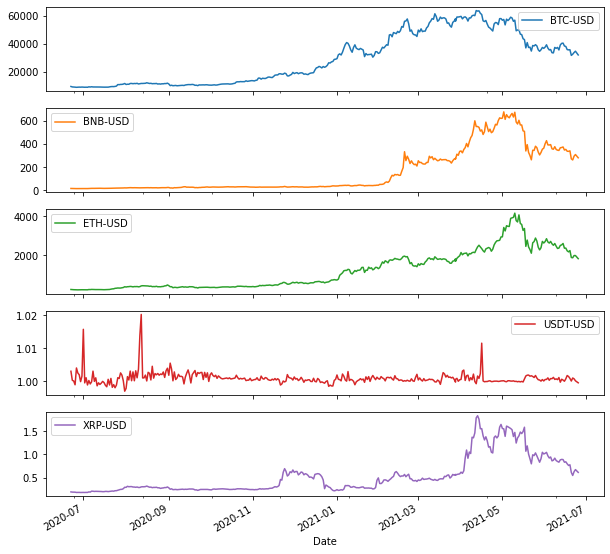

In [ ]:
datos.plot(subplots=True, figsize=(10,10))

In [ ]:
acerca=datos.describe()
for i in acerca.columns:
  a,b = acerca[i].iloc[1:3].values
  print(i,np.round(ss.norm.cdf(0,a,b) * 100 ,2),'%')

BTC-USD 5.21 %
BNB-USD 20.17 %
ETH-USD 10.53 %
USDT-USD 0.0 %
XRP-USD 8.98 %


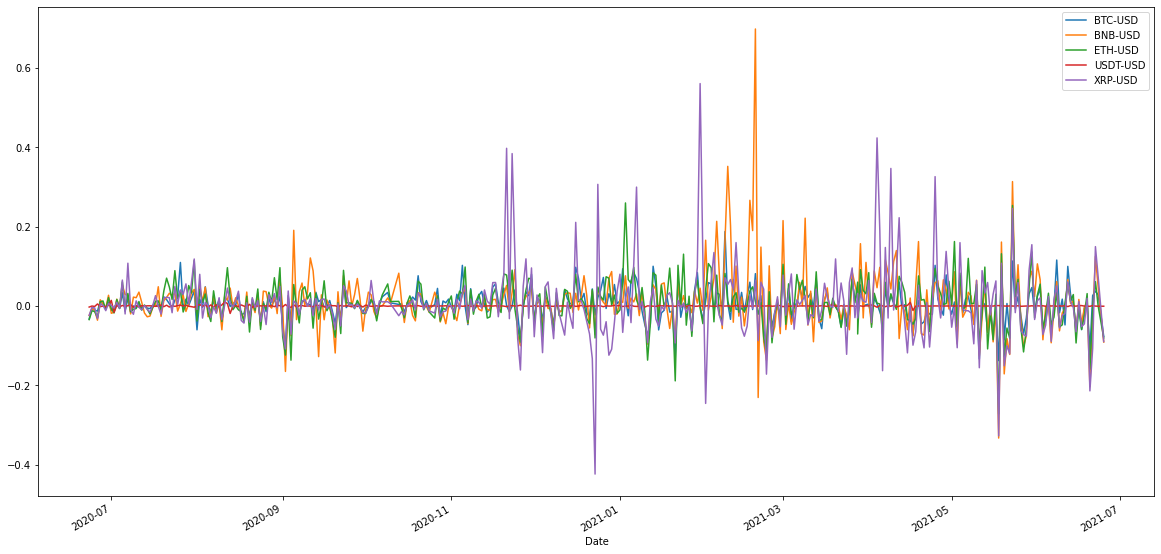

In [ ]:
retornos=datos.pct_change()
retornos.plot(figsize=(20,10))

In [ ]:
correlacion=retornos.corr()
covarianza=retornos.cov()

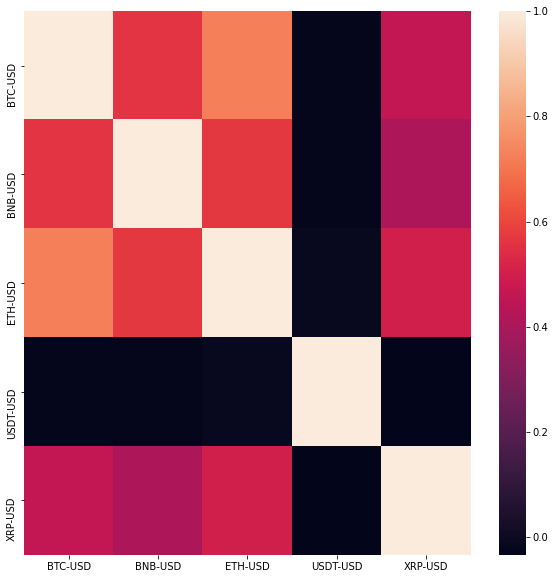

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlacion)

In [ ]:
correlacion

,BTC-USD,BNB-USD,ETH-USD,USDT-USD,XRP-USD
BTC-USD,1.000000,0.561104,0.725196,-0.023463,0.460589
BNB-USD,0.561104,1.000000,0.570038,-0.023079,0.410076
ETH-USD,0.725196,0.570038,1.000000,-0.010944,0.499353
USDT-USD,-0.023463,-0.023079,-0.010944,1.000000,-0.033713
XRP-USD,0.460589,0.410076,0.499353,-0.033713,1.000000


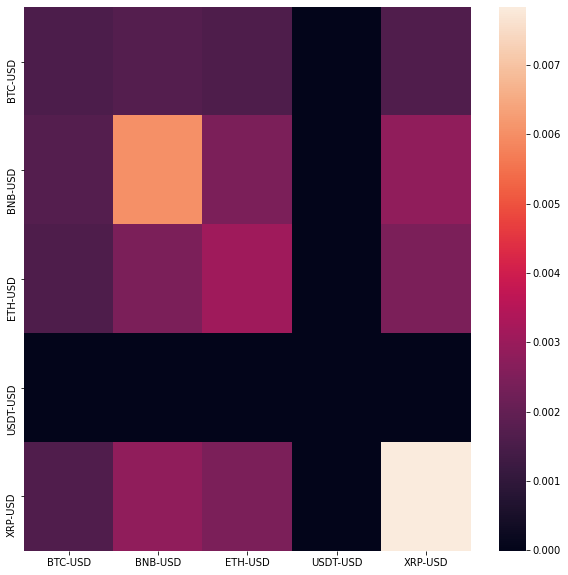

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(covarianza)

In [ ]:
mu=retornos.mean().values.reshape((5,1))
S=retornos.std().values.reshape((5,1))

In [ ]:
w = cp.Variable(5)
riesgo=cp.sqrt(np.dot(mu.T,S)+2*cp.quad_form(w.T, covarianza.values))

In [ ]:
prob = cp.Problem(cp.Minimize(riesgo), [cp.sum(w) == 1,  0 <= w])

In [ ]:
varesp=prob.solve(qcp=True)

In [ ]:
pesos=w.value
w.value

array([0.20600608, 0.19475115, 0.20307588, 0.21252773, 0.18363916])

In [ ]:
np.round(w.value,3)

array([0.206, 0.195, 0.203, 0.213, 0.184])

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
import pypfopt.plotting as ptl
nu = mean_historical_return(datos)
Su = CovarianceShrinkage(datos).ledoit_wolf()
ef = EfficientFrontier(nu, Su)
ef.add_constraint(lambda x: x[0]==98000/300000)

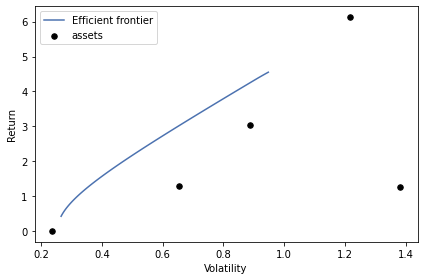

In [ ]:
fig, ax = plt.subplots()
ptl.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
pesos2=ef.max_sharpe()
peslim=ef.clean_weights()
peslim

OrderedDict([('BTC-USD', 0.32667),
             ('BNB-USD', 0.67124),
             ('ETH-USD', 0.0021),
             ('USDT-USD', 0.0),
             ('XRP-USD', 0.0)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 454.5%
Annual volatility: 94.6%
Sharpe Ratio: 4.78


(4.545086916073705, 0.9461399374663069, 4.782682494295247)